# Thyroid Diagnosis:

The purpose of this project is to distinguish between Hyperthyroid, Hypothyroid and Negative groups based on the provided data.The data is called Thyroid which is available in the UCI machine learning repository. 

**Importing the Data:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
allhyper=pd.read_csv('./allhyper/allhyper_data.csv')
allhypo=pd.read_csv('./allhypo/allhypo_data.csv')

In [3]:
print("allhyper shape:",allhyper.shape)
print("allhypo shape:", allhypo.shape)

allhyper shape: (2800, 30)
allhypo shape: (2800, 30)


In [4]:
print(allhypo.columns)

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'label'],
      dtype='object')


In [5]:
print(allhyper.columns)

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'label'],
      dtype='object')


**Data Cleaning:**

In [6]:
# Cleaning the category column
allhyper['label']=allhyper['label'].str.split('.').apply(lambda x:x[0])# selecting the str before the '.', then choose the first element

In [7]:
# Cleaning the category column
allhypo['label']=allhypo['label'].str.split('.').apply(lambda x:x[0])# selecting the str before the '.', then choose the first element

In [8]:
allhyper['label'].unique()

array(['negative', 'hyperthyroid', 'T3 toxic', 'goitre'], dtype=object)

In [9]:
allhypo['label'].unique()

array(['negative', 'compensated hypothyroid', 'primary hypothyroid',
       'secondary hypothyroid'], dtype=object)

The unique() values of allhypo and allhyper data indicate that different types of hyperthyroid and hypothyroid exist among the participant. As the main goal of this research is to distinguish between hyperthyroid, hypothyroid and Negative, the types of each disease do not matter.

In [10]:
allhyper['label']=allhyper['label'].apply(lambda x:'hyperthyroid' if (x!='negative') else 'negative')# apply a funtion to
#allhyper['label' ] by which the label will be set to 'hyperthyroid' if it is not 'negative'.

In [11]:
allhypo['label']=allhypo['label'].apply(lambda x:'hypothyroid' if (x!='negative') else 'negative')# apply a funtion to
#allhyo['label' ] by which the label will be set to 'hypothyroid' if it is not 'negative'.

In [12]:
# Integrate the allhyper and allhypo data into a new data frame
# The allhyper and allhypo data frames are exactly the same except the 'label' column!
feature_list=allhyper.columns.tolist()
feature_list.remove('label')
data=allhyper[feature_list].copy()# creating a copy of allhyper dataframe (the feature columns)
# Creating a label column for the data
for i in range(len(data)):
    if allhyper.loc[i,'label']=='hyperthyroid':
        data.loc[i,'label']='hyperthyroid'
    elif allhypo.loc[i,'label']=='hypothyroid':
        data.loc[i,'label']='hypothyroid'
    else:
        data.loc[i,'label']='negative'   

In [13]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,label
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative


In [14]:
data.label.value_counts()

negative        2503
hypothyroid      220
hyperthyroid      77
Name: label, dtype: int64

In [15]:
data.shape

(2800, 30)

In [16]:
# Check the columns for data cleaning
for col in data:
    if col!='label':
        print (col,':',allhyper[col].unique().tolist())

age : ['41', '23', '46', '70', '18', '59', '80', '66', '68', '84', '67', '71', '28', '65', '42', '63', '51', '81', '54', '55', '60', '25', '73', '34', '78', '37', '85', '26', '58', '64', '44', '48', '61', '35', '83', '21', '87', '53', '77', '27', '69', '74', '38', '76', '45', '36', '22', '43', '72', '82', '31', '39', '49', '62', '57', '1', '50', '30', '29', '75', '19', '7', '79', '17', '24', '15', '32', '47', '16', '52', '33', '13', '10', '89', '56', '20', '90', '40', '88', '14', '86', '94', '12', '4', '11', '8', '5', '455', '2', '91', '6', '?', '93', '92']
sex : ['F', 'M', '?']
on thyroxine : ['f', 't']
query on thyroxine : ['f', 't']
on antithyroid medication : ['f', 't']
sick : ['f', 't']
pregnant : ['f', 't']
thyroid surgery : ['f', 't']
I131 treatment : ['f', 't']
query hypothyroid : ['f', 't']
query hyperthyroid : ['f', 't']
lithium : ['f', 't']
goitre : ['f', 't']
tumor : ['f', 't']
hypopituitary : ['f', 't']
psych : ['f', 't']
TSH measured : ['t', 'f']
TSH : ['1.3', '4.1', '0.9

In [17]:
# Deleting some columns:
del data['TBG']
del data['TBG measured']
del data['referral source']

In [18]:
# Solve a small mistake
data.loc[data['age']=='455','age']='45'

In [19]:
# Encoding the categorical columns:
from sklearn import preprocessing
encoding_list=['on thyroxine', 'query on thyroxine','on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium','goitre', 'tumor', 'hypopituitary', 'psych',
        'TSH measured','T3 measured','TT4 measured','T4U measured','FTI measured']
# Label the data:
le = preprocessing.LabelEncoder()# define an encoder
for col in encoding_list:
    data[col]=le.fit_transform(data[col])

In [20]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,label
0,41,F,0,0,0,0,0,0,0,0,...,1.3,1,2.5,1,125,1,1.14,1,109,negative
1,23,F,0,0,0,0,0,0,0,0,...,4.1,1,2,1,102,0,?,0,?,negative
2,46,M,0,0,0,0,0,0,0,0,...,0.98,0,?,1,109,1,0.91,1,120,negative
3,70,F,1,0,0,0,0,0,0,0,...,0.16,1,1.9,1,175,0,?,0,?,negative
4,70,F,0,0,0,0,0,0,0,0,...,0.72,1,1.2,1,61,1,0.87,1,70,negative


In [21]:
# Cleaning the numeric columns:
numeric_features=['age','TSH','T3','TT4','T4U','FTI']
for col in numeric_features:
    data[col]=data[col].replace('?',np.nan)
data[numeric_features]=data[numeric_features].apply(pd.to_numeric)# Change the strings to numeric values

In [22]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,label
0,41.0,F,0,0,0,0,0,0,0,0,...,1.30,1,2.5,1,125.0,1,1.14,1,109.0,negative
1,23.0,F,0,0,0,0,0,0,0,0,...,4.10,1,2.0,1,102.0,0,NaN,0,NaN,negative
2,46.0,M,0,0,0,0,0,0,0,0,...,0.98,0,NaN,1,109.0,1,0.91,1,120.0,negative
3,70.0,F,1,0,0,0,0,0,0,0,...,0.16,1,1.9,1,175.0,0,NaN,0,NaN,negative
4,70.0,F,0,0,0,0,0,0,0,0,...,0.72,1,1.2,1,61.0,1,0.87,1,70.0,negative


In [23]:
# Imputing the missing values:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
data[numeric_features]=imp.fit_transform(data[numeric_features])

In [24]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,label
0,41.0,F,0,0,0,0,0,0,0,0,...,1.30,1,2.5,1,125.0,1,1.14,1,109.0,negative
1,23.0,F,0,0,0,0,0,0,0,0,...,4.10,1,2.0,1,102.0,0,0.98,0,107.0,negative
2,46.0,M,0,0,0,0,0,0,0,0,...,0.98,0,2.0,1,109.0,1,0.91,1,120.0,negative
3,70.0,F,1,0,0,0,0,0,0,0,...,0.16,1,1.9,1,175.0,0,0.98,0,107.0,negative
4,70.0,F,0,0,0,0,0,0,0,0,...,0.72,1,1.2,1,61.0,1,0.87,1,70.0,negative


In [25]:
# Cleaning the sex column:
data['sex']=data['sex'].replace('?',np.nan)

for i in range(len(data)):
    if data.loc[i,'sex']=='F':
        data.loc[i,'sex']=0
    if data.loc[i,'sex']=='M':
        data.loc[i,'sex']=1 

In [26]:
data['sex']=imp.fit_transform(data['sex'].values.reshape(-1,1))# impute the missing values 

In [27]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,label
0,41.0,0.0,0,0,0,0,0,0,0,0,...,1.30,1,2.5,1,125.0,1,1.14,1,109.0,negative
1,23.0,0.0,0,0,0,0,0,0,0,0,...,4.10,1,2.0,1,102.0,0,0.98,0,107.0,negative
2,46.0,1.0,0,0,0,0,0,0,0,0,...,0.98,0,2.0,1,109.0,1,0.91,1,120.0,negative
3,70.0,0.0,1,0,0,0,0,0,0,0,...,0.16,1,1.9,1,175.0,0,0.98,0,107.0,negative
4,70.0,0.0,0,0,0,0,0,0,0,0,...,0.72,1,1.2,1,61.0,1,0.87,1,70.0,negative


In [28]:
data.dtypes

age                          float64
sex                          float64
on thyroxine                   int32
query on thyroxine             int32
on antithyroid medication      int32
sick                           int32
pregnant                       int32
thyroid surgery                int32
I131 treatment                 int32
query hypothyroid              int32
query hyperthyroid             int32
lithium                        int32
goitre                         int32
tumor                          int32
hypopituitary                  int32
psych                          int32
TSH measured                   int32
TSH                          float64
T3 measured                    int32
T3                           float64
TT4 measured                   int32
TT4                          float64
T4U measured                   int32
T4U                          float64
FTI measured                   int32
FTI                          float64
label                         object
d

In [29]:
# Splitting the data to train and test:
from sklearn.model_selection import train_test_split

features=data.columns.tolist()
features.remove('label')
X=data[features]
y=data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y,random_state=42)
#stratify:If not None, data is split in a stratified fashion, using this as the class labels.

In [30]:
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (2240, 26)
y_train shape: (2240,)
X_test: (560, 26)
y_test shape: (560,)


As we have set stratify in train_test_split to y, both of the train and test sets have the same class distribution as the whole data. It means that the relative number of each label in the training set, test set and the whole data is the same.

In [31]:
(unique, counts) = np.unique(y_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print('y_train labels:',frequencies)

y_train labels: [['hyperthyroid' 62]
 ['hypothyroid' 176]
 ['negative' 2002]]


In [32]:
(unique, counts) = np.unique(y_test, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print('y_test labels:',frequencies)

y_test labels: [['hyperthyroid' 15]
 ['hypothyroid' 44]
 ['negative' 501]]


In [33]:
# Scaling the data:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [34]:
from sklearn import svm
svc=svm.SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

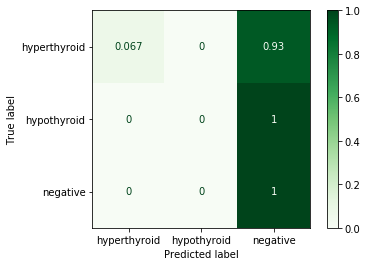

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc, X_test, y_test,cmap='Greens',normalize='true')
plt.show()

The SVM training algorithm seeks a line or hyperplane that best separates the classes. The hyperplane is defined by a margin that maximizes the distance between the decision boundary and the closest examples from each of the two classes.
When the data is highly imbalanced the svm classifier might perform well in detecting the majority class but poor in detecting the minority. By default,By default, each class has the same weighting. In the case of imbalanced data we should assign different weights to different classes(more weight to the minority class and less to the majority) which can be achieved by playing with the class_weight. 

In [36]:
# Selecting the best model:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

svc=svm.SVC(probability=True)#enable probability estimates
parameters={'C': [0.5,1,2,4],'class_weight':[{"hyperthyroid":36.09,"hypothyroid":12.71,"negative":1.11},
                                             #{"hyperthyroid":360.9,"hypothyroid":127.1,"negative":11.1},
                                             #{"hyperthyroid":721.8,"hypothyroid":254.2,"negative":22.2},
                                             {"hyperthyroid":1443.6,"hypothyroid":508.4,"negative":44.4},
                                             {"hyperthyroid":1804.5,"hypothyroid":635.5,"negative":55.5}],
                                              'kernel': ('linear', 'rbf','poly'),'degree':[3,4,5],
                                              'gamma':['auto','scale']}
# C:Regularization parameter. The strength of the regularization is inversely proportional to C
# class_weight: It penalizes mistakes in samples of class[i] with class_weight[i] instead of 1.(by default the weight of all
# classes equal to one).So higher class-weight means you want to put more emphasis on a class.
# degree: degree of the polynomial kernel function (‘poly’), ignored by all other kernells

# define a function to calculate customized f1-score(more weight is assigned to hypo and hyper groups and less to negative)
def my_custom_f1_scorer(y,y_pred):
    f1=(f1_score(y,y_pred,average=None)*np.array([4,4,1])).sum()/9
    return f1
f1_scorer= make_scorer(my_custom_f1_scorer,greater_is_better=True)

clf = GridSearchCV(svc, parameters,cv=5,scoring=f1_scorer,n_jobs=-1)
clf.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.5, 1, 2, 4],
                         'class_weight': [{'hyperthyroid': 36.09,
                                           'hypothyroid': 12.71,
                                           'negative': 1.11},
                                          {'hyperthyroid': 1443.6,
                                           'hypothyroid': 508.4,
                                           'negative': 44.4},
                                          {'hyperthyroid': 1804.5,
                                           'hypothyroid': 635.5,
                                           'negative': 55.5}],
                         'degree': [3, 4, 5], 'gamma': ['auto', 'scale'],
                         'kernel': ('linear', 'rbf', 'poly')},
             scoring=make_scorer(my_custom_f1_scorer))

In [37]:
selected_params=clf.best_params_
svc.set_params(**selected_params)

SVC(C=2,
    class_weight={'hyperthyroid': 1804.5, 'hypothyroid': 635.5,
                  'negative': 55.5},
    degree=4, kernel='poly', probability=True)

In [38]:
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

In [39]:
from sklearn.metrics import classification_report
target_names=['hyperthyroid','hypothyroid','negative']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

hyperthyroid       0.56      0.93      0.70        15
 hypothyroid       0.88      0.86      0.87        44
    negative       0.99      0.97      0.98       501

    accuracy                           0.96       560
   macro avg       0.81      0.92      0.85       560
weighted avg       0.97      0.96      0.96       560



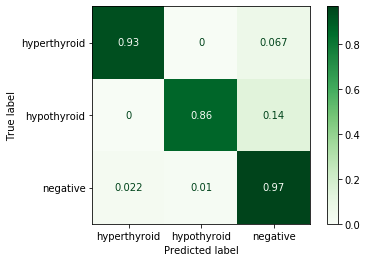

In [40]:
plot_confusion_matrix(svc, X_test, y_test,cmap='Greens',normalize='true')
plt.show()

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve corresponds to both high recall and high precision.
Precision is defined as the number of true positives (Tp) over the number of true positives plus the number of false positives (Fp).
Recall is defined as the number of true positives (Tp) over the number of true positives plus the number of false negatives (Fn).

High precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).
Reducing the threshold increases the false positive rate(Fp)=> precision reduces
while increasing it increases the false negative rate(Fn)=> recall reduces

In [41]:
ytest=le.fit_transform(y_test)# converting the y_test to numerical values by LabelEncoder
ytest=np.eye(3)[ytest]# convert the labels to the onehot format

In [42]:
y_score=svc.decision_function(X_test)

In [43]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
precision = dict()
recall = dict()
average_precision = dict()
for i in range(3):
    labels=['hyperthyroid','hypothyroid','negative']
    precision[i], recall[i], _ = precision_recall_curve(ytest[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(ytest[:, i], y_score[:, i])
    

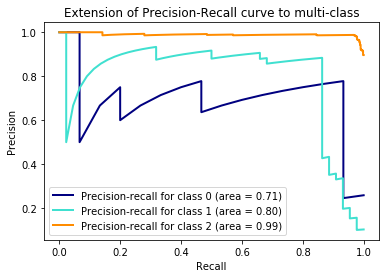

In [44]:
from itertools import cycle
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])
labels=[]

for i, color in zip(range(3), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))
    
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(labels)
plt.show()